# Cours
* [OpenClassRooms - librairies Data Science](https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science)

# Sommaire 
* [exemple du problème de Monty Hall](#montyhall)
* [théorème central limite](#theoremecentralimite)

<a id="montyhall"></a>

## exemple du problème de Monty Hall

L'exposé du problème est plutôt simple. Imaginez un jeu télévisé où il y a trois portes sur le plateau de jeu. Seule une de ces portes cache un trésor. Il n'y a rien derrière les deux autres portes. Rien ne permet de savoir quelle porte cache le trésor.

La tâche du joueur consiste à choisir parmi les trois portes celle qu'il veut ouvrir. Il aura droit au trésor s'il choisit la bonne porte, et rien sinon. Pour faire son choix, il n'a aucune information. Il doit donc simplement s'en remettre au hasard.

Jusqu'ici, le problème n'a rien de remarquable. Mais il y a un twist ! Une fois que le joueur a fait son choix, mais avant d'ouvrir la porte, le présentateur élimine, parmi les deux portes non choisies, une porte qui ne contient pas de trésor. Si les deux portes restantes ne contiennent rien, le présentateur élimine simplement une d'entre elles au hasard.

Le joueur doit alors faire un nouveau choix. Il peut soit choisir d'ouvrir la première porte qu'il avait choisie, soit changer pour la porte non éliminée par le présentateur. La question est, qu'a-t-il intérêt à faire ? Réfléchissez-y. Vous n'avez en principe pas besoin de connaissances poussées en probabilités pour résoudre ce problème. Que feriez-vous ?

CHANGER pourcentage de réussite : 66.99000000000001%
GARDER pourcentage de réussite : 34.12%


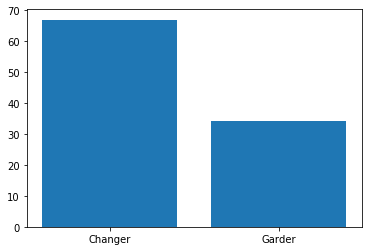

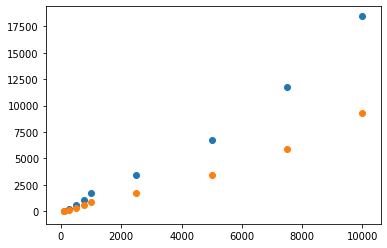

In [2]:
%matplotlib inline
import random as rd
import enum as e
import matplotlib.pyplot as plt

class Strategie(e.Enum):
    CHANGER = 1
    GARDER = 0
    
    
def play_game(strategie):
    
    # print("-------------------------------------------------")
    # print("---- Premier choix... que va-t-il choisir ?? ----")
    # print("-------------------------------------------------")
    
    portes = [0,1,2]
    # print(portes)
    
    bonne_porte = rd.randint(0,2)
    # print("bonne porte : {}".format(bonne_porte))
    
    premier_choix = rd.randint(0,2)
    # print("premier choix : {}".format(premier_choix))
    
    portes.remove(premier_choix)
    # print("portes restantes sans premier choix : {}".format(portes))
    
    if premier_choix == bonne_porte:
        portes.remove(portes[rd.randint(0,1)])
        #print("si premier choix = bonne porte")
        # print("portes restantes en plus du premier choix : {}".format(portes))
    else :
        portes = [bonne_porte]
        #print("sinon")
        # print("portes restantes en plus du premier choix : {}".format(portes))
        
    
    # print("-------------------------------------------------")
    # print("---- ICI il lui reste le choix entre [{},{}] ----".format(premier_choix, portes[0]))
    # print("---- Que va-t-il faire ? Changer ou Garder ? ----")
    # print("-------------------------------------------------")
        
    # il reste un seul élément dans portes qui est le second choix possible
    
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
        # print("CHANGER pour la porte restante: {}".format(deuxieme_choix))
    else:
        deuxieme_choix = premier_choix
        # print("GARDER son premier choix: {}".format(deuxieme_choix))

    return deuxieme_choix == bonne_porte


# une version qui se base sur True or False en tant que résultat
# le problème c'est que ces valeurs ne sont pas exploitables pour tracer un graphique
# mieux vaut renvoyer des 1 ou des 0
# on pourrait modifier la fonction play_game mais il y a plus propre à faire
"""
def play(strategie, nb_tours):
    results = []
    i = 0
    while i < nb_tours:
        results.append(play_game(strategie))
        i += 1
    return results
    
results_changer = play(Strategie.CHANGER, 30000)
print("CHANGER pourcentage de réussite : {}%".format((results_changer.count(True)/len(results_changer))*100))

results_garder = play(Strategie.GARDER, 30000)
print("GARDER pourcentage de réussite : {}%".format((results_garder.count(True)/len(results_garder))*100))
"""

def play(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

nb_tours = 10000

results_changer = play(Strategie.CHANGER, nb_tours)
pourc_changer = (sum(results_changer)/nb_tours)*100
print("CHANGER pourcentage de réussite : {}%".format(pourc_changer))

results_garder = play(Strategie.GARDER, nb_tours)
pourc_garder = (sum(results_garder)/nb_tours)*100
print("GARDER pourcentage de réussite : {}%".format(pourc_garder))


# la méthode plot dessine des points et les relie entre eux
# comme nous avons trop de points, le résultat ressemble à un carré plein
# plt.plot(results_changer)
# plt.plot(results_garder)

# la méthode scatter dessine des points aussi mais sans les relier
# x & y doivent être de la même taille, ici nb_tours éléments
# le problème de ce graphe c'est qu'il n'est pas exploitable pour une meilleure compréhension de la différence de résultat
# plt.scatter(range(nb_tours), results_changer)
# plt.scatter(range(nb_tours), results_garder)

# la méthode bar dessine des barres 
# le premier argument [1,2] aurait pu être [5,6] ou plutôt [abscicsse bar 1, abscicsse bar 2]
# le second argument [pourc_changer,pourc_garder] sont les hauteurs des barres
# le troisième argument tick_label=["Changer", "Garder"] est le libellé des barres
plt.bar([1,2], [pourc_changer,pourc_garder], tick_label=["Changer", "Garder"])


# voir l'évolution des gains en fonction de chaque stratégie
gains_changer = []
gains_garder = []
sample_nbtours = [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]

for i in sample_nbtours:
    gains_changer.append(sum(play(Strategie.CHANGER, i)))
    gains_garder.append(sum(play(Strategie.GARDER, i)))
    
def calcul_evol(gains):
    gains_evol = []
    for gain in gains:
        i = gains.index(gain)
        cumul = 0
        while i >= 0:
            cumul += gains[i]
            i -=1
        gains_evol.append(cumul)
    return gains_evol
    
gains_changer_evol = calcul_evol(gains_changer)
gains_garder_evol = calcul_evol(gains_garder)


plt.figure() # permet d'avoir une nouvelle figure
plt.scatter(sample_nbtours, [gains_changer_evol])
plt.scatter(sample_nbtours, [gains_garder_evol])


<a id="centralelimite"></a>

##  théorème central limite

[Théorème central limite explications](https://www.youtube.com/watch?v=4dhm2QAA2x4)

* X une variable aléatoire : x1 et x2 deux valeurs possibles qui représentent l'état de cette variable

* X une variable aléatoire discrète ayant pour fonction de masse P(X) 
  * X --> P(X)
  * P(x1) est la probabilité que X = x1
  * une fonction de masse est : 
    * P est l'ensemble des états de X
    * 0 <= P(X) <= 1
    * sum(x€X) P(x) = 1

* X une variable aléatoire continue ayant pour fonction de densité p(X)
  * on intègre p(x) pour connaître la proba que X=x
  * fonction de densité p
    * domaine de p = ensemble des états possible de X
    * pour tout x€X p(x) >= 0
    * intégrale p(x)dx = 1 (air sous la courbe p(x)

* X une variable aléatoire discrète obéissant à une distribution quelconque
  * ex : un dé truqué qui fait plus souvent 1 et 6;  X:{1,2,3,4,5,6} --> P(X):{40%,5%,5%,5%,5%,40%}
  * la distribution de la moyenne des échantillons s'approche d'une loi normale quand le nombre d'échantillon est élevé (distribution gaussienne)
    * échantillon S1:{1,1,6,3,6,1,2,1,1,6} --> moyenne = (1+1+6+3+6+1+2+1+1+6)/10 = 2.8
  * si la taille échantillon --> + infini alors la distribution des moyennes s'approche de + en + d'une loi normale

-------------------------------
--- distribution gaussienne ---
-------------------------------


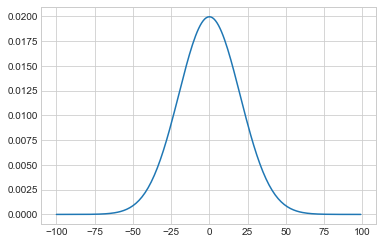


-------------------------------
--- théorème central limite ---
-------------------------------


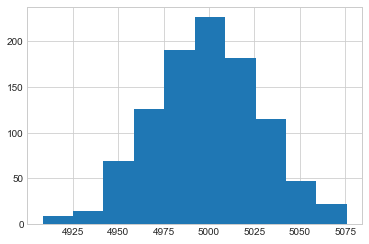

La moyenne empirique de notre distribution est 4998.754278510733.
La moyenne empirique de la variable généré par la fonction rand est 0.5011835263616943.
La variance empirique de notre distribution est 849.0455069683024.
La variance empirique de la variable généré par la fonction rand est 0.08936399340435398.


In [11]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, exp


print("-------------------------------")
print("--- distribution gaussienne ---")
print("-------------------------------")

domaine = range(-100,100) # génère une liste de -100 à 100 qui incrèmente de 1
mu = 0
sigma = 20

f = lambda x : 1/(sqrt(2*pi*pow(sigma,2))) * exp(-pow((x-mu),2)/(2*pow(sigma,2)))
y = [f(x) for x in domaine] 
"""
c'est la même chose que :
y = []
for x in domaine:
    y.append(f(x))
"""

plt.plot(domaine, y)
plt.show()
print()


print("-------------------------------")
print("--- théorème central limite ---")
print("-------------------------------")

# version crade
# somme de variables aléatoires différentes identiquement distribuées
"""
nb_var = 100000
sum_var = np.zeros(10000)
i=0
while i < nb_var:
    sum_var += np.random.uniform(0,1,10000)
    i +=1
plt.hist(sum_var, bins=100)
plt.show()
"""

# version crade
# moyenne des échantillons d'une distribution aléatoire
# tous les échantillons sont des variables aléatoires identiquement distribués
# bins donne le nombre de catégories pour répartir les données.
# si les nombres sont réels ils ont de grande chance d'être unique donc d'être dans un max de catégories différentes
# alors que là les nombres proches sont regroupés
"""
nb_echantillon = 10000
taille_echantillon = 1000
moyenne_echantillon = []
i=0
while i < nb_echantillon:
    echantillon = np.random.uniform(0,1,taille_echantillon)
    moyenne_echantillon.append(sum(echantillon)/len(echantillon))
    i +=1


plt.hist(moyenne_echantillon, bins=100) 
plt.show()
"""
    
# version propre : utilisation des matrices
nb_echantillon = 10000
taille_echantillon = 1000
sommes = np.sum(np.random.rand(nb_echantillon, taille_echantillon),0)
plt.hist(sommes, bins=10) 
plt.show()


print("La moyenne empirique de notre distribution est {}."
      .format(np.mean(sommes)))
print("La moyenne empirique de la variable généré par la fonction rand est {}."
      .format(np.mean(np.random.rand(taille_echantillon))))
print("La variance empirique de notre distribution est {}."
      .format(np.var(sommes)))
print("La variance empirique de la variable généré par la fonction rand est {}."
      .format(np.var(np.random.rand(taille_echantillon))))



<a id="montyhallnumpy"></a>

## Monty Hall avec Numpy

On peut reformuler le problème de cette manière :

* si (premier_choix != bonne_porte)
  * si joueur CHANGE --> gagne (1)
  * si joueur GARDE  --> perd  (0)
* else (premier_choix == bonne_porte)
  * si joueur CHANGE --> perd  (0)
  * si joueur GARDE  --> gagne (1)
  
Ce qui veut aussi dire :

* les gains du joueurs s'il CHANGE
  * si premier_choix != bonne_porte --> 1
  * si premier_choix == bonne_porte --> 0
* les gains du joueur s'il GARDE
  * si premier_choix == bonne_porte --> 1
  * si premier_choix != bonne_porte --> 0

[1 0 0 0 1 1 0 1 1 0]
[1 1 1 1 2 3 3 4 5 5]


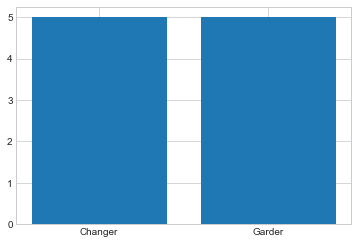

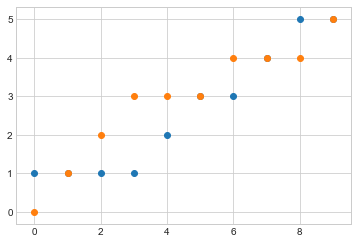

In [20]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

N_TRIALS = 10

prizes = np.random.randint(0,3, size=(N_TRIALS))
first_choices = np.random.randint(0,3, size=(N_TRIALS))

# les gains du joueurs s'il CHANGE
#    si premier_choix != bonne_porte --> 1
#    si premier_choix == bonne_porte --> 0
switching_player_gains = (prizes!=first_choices).astype(int) # remplace True par 1 et False par 0


# les gains du joueur s'il GARDE
#    si premier_choix == bonne_porte --> 1
#    si premier_choix != bonne_porte --> 0
keeping_player_gains = (prizes==first_choices).astype(int)

plot = plt.bar([1,2],[switching_player_gains.sum(), keeping_player_gains.sum()],tick_label=["Changer","Garder"])

figure = plt.figure()
# la fonction cumsum() cumule chaque valeur de la liste aur fur et à mesure
# autrement la liste ne contient que des 0 et 1
plot = plt.scatter(range(N_TRIALS), switching_player_gains.cumsum()) 
plot = plt.scatter(range(N_TRIALS), keeping_player_gains.cumsum())
